<a href="https://colab.research.google.com/github/Musu1/Deep-Learning/blob/master/pyTorch_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Data Loading

In [0]:
import torchvision #This library is for using computer vision with pytorch
import torchvision.transforms as transforms
# Data set which we are using is CIFAR10 which has 32x32 size images dividede in 10 classes can be found on google. Also there is CIFAR100 which has 100 classes
#We can either download manually or use this comand to download this particular dataset
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transforms.ToTensor())

0it [00:00, ?it/s]

170500096it [00:04, 42075080.66it/s]                               


Extracting ./data/cifar-10-python.tar.gz to ./data


In [0]:
# Now the labels from the data would be indexes and not the names so we are manually putting them
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [0]:
# We are loading data from trainset (downloaded one) and in batch size of 4 that is everytime it will give me 4 different images
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle='True')

In [0]:
#Now I need to create an iterator to iterate over the trainloader
dataiter=iter(trainloader)
images,labels=dataiter.next()
print(images.shape) #This would give us a batch of four images size
print(images[0].shape) # This shows length,width and height of a image
print(labels[0].item()) # This will return an index which can be inferred from classes

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
5


#Visualise data

In [0]:
img=images[0]
print(type(img))

<class 'torch.Tensor'>


In [0]:
# Now to plot we need to convert it to numpy
npimg=img.numpy()
print(npimg.shape)

(3, 32, 32)


In [0]:
# To plot we should have first x then y and then z so we need to transpose this numpy img
#In 3d transpose can be of 3 ways but we want x first then y and finally z
npimg=np.transpose(npimg,(1,2,0))
print(npimg.shape)

(32, 32, 3)


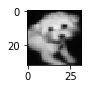

In [0]:
#Now we caan plot
plt.figure(figsize=(1,1))
plt.imshow(npimg)
plt.show()

In [0]:
#So now I can all these plotting in a fxn
def imshow(img):
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

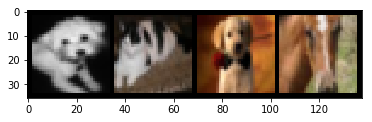

dog cat dog horse


In [0]:
# Now I can show in grid also

imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

# Single covolutional layer

In [0]:
import torch.nn as nn

In [0]:
class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1=nn.Conv2d(3,16,3,padding=(1,1),stride=(2,2)) # So here we are only defining one convolutional layer that is just pass the img through this layer and get
                                                            # output. also first parameter is depth of kernel=depth of the input and second parameter is number of output
                                                            # channel = number of different kernel we are gonna apply to img and third parameter is size of the kernel
        # We can remove stride and padding also that is optional
  def forward(self,x):
    x=self.conv1(x)
    return x

In [0]:
net=FirstCNN()

In [0]:
out=net(images)

In [0]:
out.shape # second parameter depends on number of kernels applied and width,height of reulting image can be calculated ny assuming padding and stride as 0 here

torch.Size([4, 16, 16, 16])

In [0]:
for param in net.parameters():
  print(param.shape) # So since linear calculates all the parameter internally if we want to see them use this. So we have two parameters one kernels and one bias. So
  # Bias is equal to number of kernels that is one bias for each kernel and we can see width,height and depth of kernels and their numbers.

torch.Size([16, 3, 3, 3])
torch.Size([16])


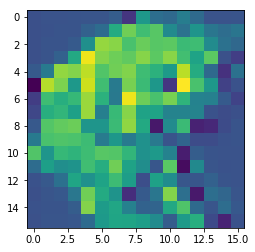

In [0]:
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()
# Plotting one of output layers

# Deep Convolutional layer

In [0]:
class FirstCNN_v2(nn.Module):
  def __init__(self):
    super(FirstCNN_v2,self).__init__()
    self.model=nn.Sequential(nn.Conv2d(3,8,3),     #(N,3,32,32) -> (N,8,30,30)
                            nn.Conv2d(8,16,3))     #(n,8,30,30) -> (N,16,28,28)
  def forward(self,x):
    x=self.model(x)
    return x

In [0]:
net=FirstCNN_v2()
out=net(images)
out.shape

torch.Size([4, 16, 28, 28])

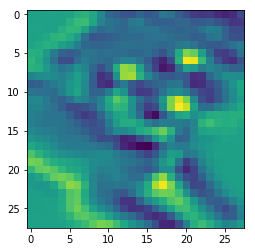

In [0]:
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()

In [0]:
class FirstCNN_v3(nn.Module):
  def __init__(self):
    super(FirstCNN_v3,self).__init__()
    self.model=nn.Sequential(nn.Conv2d(3,6,5),     #(N,3,32,32) -> (N,6,28,28)
                             nn.AvgPool2d(2,stride=2), # (N,6,28,28) -> (N,6,14,14)
                            nn.Conv2d(6,16,5),     #(N,6,14,14) -> (N,16,10,10)
                            nn.AvgPool2d(2,stride=2)) #(N,16,10,10) -> (n,16,5,5)
                         
  def forward(self,x):
    x=self.model(x)
    return x

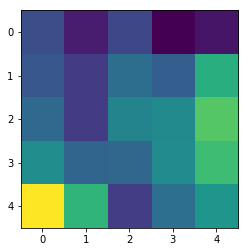

In [0]:
net=FirstCNN_v3()
out=net(images)
out.shape
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()

# LeNet

In [0]:
# Here we are not training LeNet just instantionating it. That is no loss and accuracy here. Just the layers
# In lenet we have 4 convolutional layers and then 3 Full connected layers.
# Here I am using tanh activation fxn ,but normally for CNN we use ReLu 
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet,self).__init__()
    self.cnnmodel=nn.Sequential(nn.Conv2d(3,6,5),    # (N,3,32,32) -> (N,6,28,28)
                               nn.Tanh(),            
                               nn.AvgPool2d(2,stride=2), #(N,6,28,28) -> (N,6,14,14)
                               nn.Conv2d(6,16,5),        #(N,6,14,14) -> (N,16,10,10)
                               nn.Tanh(),
                               nn.AvgPool2d(2,stride=2)) #(N,16,10,10) -> (N,16,5,5)
    self.fc_model=nn.Sequential(nn.Linear(400,120),      # (N,(16*5*5)) -> (N,120)
                                nn.Tanh(),
                               nn.Linear(120,84),        #(N,120) ->(N,84)
                               nn.Tanh(),
                               nn.Linear(84,10))         #(N,84) ->(N,10)
  def forward(self,x):
    print(x.shape)
    x=self.cnnmodel(x)
    print(x.shape)
    x=x.view(x.size(0),-1)  # To reshape the data after convolutional layer to make it ready for fully connected layers we use view fxn and -1 parameter makes sure of getting one row
    print(x.shape)
    x=self.fc_model(x)
    print(x.shape)
    return x

In [0]:
net=LeNet()
out=net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [0]:
print(out)

tensor([[ 0.0003,  0.1305,  0.0425, -0.0387,  0.1977,  0.0123,  0.0039,  0.1007,
         -0.0286, -0.0842],
        [-0.0019,  0.1318,  0.0408, -0.0482,  0.1845,  0.0179, -0.0073,  0.0911,
         -0.0248, -0.0939],
        [-0.0149,  0.1460,  0.0217, -0.0213,  0.1909,  0.0048,  0.0003,  0.1168,
         -0.0372, -0.0880],
        [-0.0042,  0.1332,  0.0315, -0.0276,  0.1834,  0.0279,  0.0064,  0.1145,
         -0.0347, -0.0664]], grad_fn=<AddmmBackward>)


In [0]:
# So maximum of 10 values will be the output for that image simalry since we have 4 images in a batch so 4 outputs
pred_class,max_class=torch.max(out.data,1)
print(pred_class)
print(max_class)

tensor([0.1977, 0.1845, 0.1909, 0.1834])
tensor([4, 4, 4, 4])


# Training LeNet

In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet,self).__init__()
    self.cnnmodel=nn.Sequential(nn.Conv2d(3,6,5),    # (N,3,32,32) -> (N,6,28,28)
                               nn.Tanh(),            
                               nn.AvgPool2d(2,stride=2), #(N,6,28,28) -> (N,6,14,14)
                               nn.Conv2d(6,16,5),        #(N,6,14,14) -> (N,16,10,10)
                               nn.Tanh(),
                               nn.AvgPool2d(2,stride=2)) #(N,16,10,10) -> (N,16,5,5)
    self.fc_model=nn.Sequential(nn.Linear(400,120),      # (N,(16*5*5)) -> (N,120)
                                nn.Tanh(),
                               nn.Linear(120,84),        #(N,120) ->(N,84)
                               nn.Tanh(),
                               nn.Linear(84,10))         #(N,84) ->(N,10)
  def forward(self,x):
    print(x.shape)
    x=self.cnnmodel(x)
    print(x.shape)
    x=x.view(x.size(0),-1)  # To reshape the data after convolutional layer to make it ready for fully connected layers we use view fxn and -1 parameter makes sure of getting one row
    print(x.shape)
    x=self.fc_model(x)
    print(x.shape)
    return x

In [0]:
batch_size=128
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transforms.ToTensor())
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
testset=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transforms.ToTensor())
testLoader=torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
# This evaluation funxtion tella the accuracy of over model
def evaluation(dataloader):
  total,correct=0,0
  for data in dataloader:
    inputs,labels=data
    outputs=net(inputs)
    _,pred=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(pred==labels).sum().item()
  return 100*(correct/total)
    

In [0]:
net=LeNet()

In [0]:
# Now we are starting the back pro[agation first define optimizer and loss fxn for this

import torch.optim as optim
loss_fn=nn.CrossEntropyLoss()
opt=optim.Adam(net.parameters())

torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
to

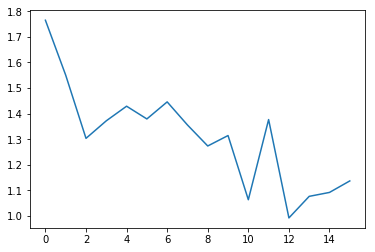

CPU times: user 8min 43s, sys: 9.41 s, total: 8min 52s
Wall time: 8min 49s


In [0]:
%%time
loss_arr=[]
loss_epoch_arr=[]
max_epochs=16

for epoch in range(max_epochs):
  
  for i,data in enumerate(trainloader,0):
    inputs,labels=data
    opt.zero_grad()
    outputs=net(inputs) # Forward pass
    loss=loss_fn(outputs,labels) # Loss calculation
    loss.backward() # Backward propagation
    opt.step() # Weight updation according to the optimizer here ADAM
    loss_arr.append(loss.item())
    
  loss_epoch_arr.append(loss.item())
  print('Epoch: %d/%d ,Test Accuracy =%0.2f, Train Accuracy= %0.2f' % (epoch,max_epochs,evaluation(testLoader),evaluation(trainloader)))
 
plt.plot(loss_epoch_arr)
plt.show()

#Move to GPU

In [0]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
def evaluation(dataloader):
  total,correct=0,0
  for data in dataloader:
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    outputs=net(inputs)
    _,pred=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(pred==labels).sum().item()
  return 100*(correct/total)

In [0]:
net=LeNet().to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.Adam(net.parameters())

In [0]:
%%time
max_epochs=16


for epoch in range(max_epochs):
  
  for i,data in enumerate(trainloader,0):
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    opt.zero_grad()
    outputs=net(inputs) # Forward pass
    loss=loss_fn(outputs,labels) # Loss calculation
    loss.backward() # Backward propagation
    opt.step() # Weight updation according to the optimizer here ADAM
    
  print('Epoch: %d/%d ,Test Accuracy =%0.2f, Train Accuracy= %0.2f' % (epoch,max_epochs,evaluation(testLoader),evaluation(trainloader)))
 
plt.plot(loss_epoch_arr)
plt.show()

torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
to

CPU times: user 4min 33s, sys: 7.17 s, total: 4min 40s
Wall time: 4min 34s
